<a href="https://colab.research.google.com/github/Rebecca-202211/dataanalytics/blob/main/Global_Spotify_Weekly_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kabhishm/global-spotify-weekly-chart

In [ ]:
! mkdir global-spotify-weekly-chart

In [ ]:
! unzip global-spotify-weekly-chart.zip -d global-spotify-weekly-chart

In [ ]:
import pandas as pd
import numpy as np
spotify_chart = pd.read_csv('/content/global-spotify-weekly-chart/spotify_weekly_chart.csv')
spotify_chart.head(5)

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,Miley Cyrus,Flowers,7,1,7.0,56744018,-5019054.0,585390148
1,2,NEW,KAROL G,TQG,1,2,1.0,53284451,NaN,53284451
2,3,NEW,The Weeknd,Die For You,1,3,1.0,46213370,NaN,46213370
3,4,-2,SZA,Kill Bill,12,1,2.0,45630547,-918530.0,556085332
4,5,-2,PinkPantheress,Boy's a liar Pt. 2,4,3,1.0,39475419,303113.0,123300074


# **Columns Details**
**Pos**
:position of the song in the chart

**P+**
:number of position increased since last week

**Artist**
:name of the artist

**Title**
:title of the song

**Wks**
:number of weeks spent on the chart

**Pk**
:peak position of the song

**(x?)**
:number of times the peak position has been attained

**Streams**
:number of streams of the song

**Streams+**
:number of streams increased or decreased since last week

**Total**
:total number of streams

In [ ]:
spotify_chart.rename(columns={"(x?)": "Pk_times"},inplace=True)
spotify_chart

,Pos,P+,Artist,Title,Wks,Pk,Pk_times,Streams,Streams+,Total
0,1,=,Miley Cyrus,Flowers,7,1,7.0,56744018,-5019054.0,585390148
1,2,NEW,KAROL G,TQG,1,2,1.0,53284451,NaN,53284451
2,3,NEW,The Weeknd,Die For You,1,3,1.0,46213370,NaN,46213370
3,4,-2,SZA,Kill Bill,12,1,2.0,45630547,-918530.0,556085332
4,5,-2,PinkPantheress,Boy's a liar Pt. 2,4,3,1.0,39475419,303113.0,123300074
...,...,...,...,...,...,...,...,...,...,...
195,196,-1,Ayra Starr,Rush,3,172,NaN,7464507,95501.0,22698871
196,197,-1,Coolio,Gangsta's Paradise,66,40,NaN,7458994,130827.0,432796603
197,198,RE,Macklemore & Ryan Lewis,Can't Hold Us,40,107,NaN,7432128,NaN,253903960
198,199,-12,Conan Gray,Heather,136,12,NaN,7393629,-118755.0,1085427136


In [ ]:
spotify_chart.size

2000

In [ ]:
spotify_chart.describe()

,Pos,Wks,Pk,Pk_times,Streams,Streams+,Total
count,200.000000,200.000000,200.000000,32.000000,2.000000e+02,1.840000e+02,2.000000e+02
mean,100.500000,44.320000,44.430000,4.343750,1.234559e+07,9.807673e+04,4.752502e+08
std,57.879185,62.797814,45.874365,4.052951,7.487268e+06,1.387336e+06,6.045380e+08
min,1.000000,1.000000,1.000000,1.000000,7.380345e+06,-6.062515e+06,7.470526e+06
25%,50.750000,8.750000,8.000000,1.000000,8.161052e+06,-3.738820e+05,8.970985e+07
50%,100.500000,21.500000,26.000000,2.500000,9.651425e+06,-2.269000e+03,2.496519e+08
75%,150.250000,43.500000,68.500000,7.000000,1.335033e+07,3.040725e+05,6.190585e+08
max,200.000000,317.000000,195.000000,14.000000,5.674402e+07,8.062485e+06,3.379518e+09


**Data Cleaning**


In [ ]:
#check missing values
spotify_chart.isna().sum()

Pos           0
P+            0
Artist        0
Title         0
Wks           0
Pk            0
Pk_times    168
Streams       0
Streams+     16
Total         0
dtype: int64

In [ ]:
spotify_chart.loc[8]

Pos                  9
P+                  -1
Artist         Yandel 
Title       Yandel 150
Wks                  8
Pk                   8
Pk_times           NaN
Streams       26978839
Streams+     2005666.0
Total        181143781
Name: 8, dtype: object

In [ ]:
#check missing values in Pk_times
Pk_times_na = spotify_chart[['Title','Pk','Pk_times']][spotify_chart.Pk_times.isna()]
Pk_times_na['Title+Pk'] = Pk_times_na.apply(lambda x: '{},{}'.format(x['Title'],x['Pk']), axis=1)
Pk_times_na[['Title+Pk']]

,Title+Pk
8,"Yandel 150,8"
10,"La Bachata,4"
11,"Calm Down,9"
12,"X SI VOLVEMOS,13"
13,"Die For You,12"
...,...
195,"Rush,172"
196,"Gangsta's Paradise,40"
197,"Can't Hold Us,107"
198,"Heather,12"


In [ ]:
#fill missing values in Pk_times with 0 
spotify_chart.Pk_times.fillna(0, inplace=True)
spotify_chart.Pk_times.isna().sum()

0

Since the number of missing values in Pk_times is equal to the number of the combination of Title and Peak of the data with missing values in Pk_times, those missing values are allowed to filled in with 0.

In [ ]:
#check missing values in Streams+
title_count = pd.DataFrame(spotify_chart['Title'].value_counts())
title_count.reset_index(inplace=True)

In [ ]:
title_count.columns = ['Title','times']
title_count

,Title,times
0,Die For You,2
1,Until I Found You,2
2,Calm Down,2
3,Sure Thing,2
4,Flowers,1
...,...,...
191,Fin de Semana,1
192,Miss You,1
193,El Gordo Trae El Mando,1
194,We Found Love,1


In [ ]:
title_not1 = list(title_count['Title'][title_count['times'] > 1])

In [ ]:
title_not1

['Die For You', 'Until I Found You', 'Calm Down', 'Sure Thing']

In [ ]:
clean_splus = spotify_chart[spotify_chart['Title'].isin(title_not1)].sort_values(by = ['Title','Wks'], ascending = [False, True])
clean_splus_title = clean_splus[clean_splus['Streams+'].isna()]['Title']

In [ ]:
clean_splus[clean_splus['Title'].isin(clean_splus_title)]

,Pos,P+,Artist,Title,Wks,Pk,Pk_times,Streams,Streams+,Total
2,3,NEW,The Weeknd,Die For You,1,3,1.0,46213370,NaN,46213370
13,14,-2,The Weeknd,Die For You,59,12,0.0,22988828,1333396.0,687729855


In [ ]:
#fill missing values in Streams+
spotify_chart['Streams+'].fillna(0,inplace = True)
spotify_chart.isna().sum()

Pos         0
P+          0
Artist      0
Title       0
Wks         0
Pk          0
Pk_times    0
Streams     0
Streams+    0
Total       0
dtype: int64

Since the missing values in Streams+ are either from the songs that only appear once or the songs appear more than once, but when they were on the chart for the first time, the missing values in Streams can be filled in with 0.

**Data Processing**

In [ ]:
data = spotify_chart.copy()

In [ ]:
data.dtypes

Pos           int64
P+           object
Artist       object
Title        object
Wks           int64
Pk            int64
Pk_times    float64
Streams       int64
Streams+    float64
Total         int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

Label Encoding: P+

In [ ]:
label_encoder = LabelEncoder()
data['P+'] = label_encoder.fit_transform(data['P+'])

In [ ]:
data.head(5)

,Pos,P+,Artist,Title,Wks,Pk,Pk_times,Streams,Streams+,Total
0,1,64,Miley Cyrus,Flowers,7,1,7.0,56744018,-5019054.0,585390148
1,2,65,KAROL G,TQG,1,2,1.0,53284451,0.0,53284451
2,3,65,The Weeknd,Die For You,1,3,1.0,46213370,0.0,46213370
3,4,40,SZA,Kill Bill,12,1,2.0,45630547,-918530.0,556085332
4,5,40,PinkPantheress,Boy's a liar Pt. 2,4,3,1.0,39475419,303113.0,123300074


**Here are several questions:**

**1. Which factor correlates with Total Streams the most?** 

**2. Using regression model to predict Total Streams.**

**Q1: Which factor correlates the Total Streams the most?**

In [ ]:
data.corr()['Total'].sort_values()

<ipython-input-116-a11e4ca000c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Total'].sort_values()


Pk         -0.466725
P+         -0.180584
Pos        -0.044908
Streams    -0.004923
Streams+    0.016980
Pk_times    0.616175
Wks         0.821732
Total       1.000000
Name: Total, dtype: float64

**Q2: Using regression model to predict Total Streams.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['Total','Artist','Title'], axis = 1)
Y = data['Total']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=45)

lrm = LinearRegression()
lrm.fit(x_train,y_train)
score = lrm.score(x_train,y_train)
print('R^2(all features): {}'.format(score))

predict = lrm.predict(x_test)

R^2(all features): 0.8638026456623842


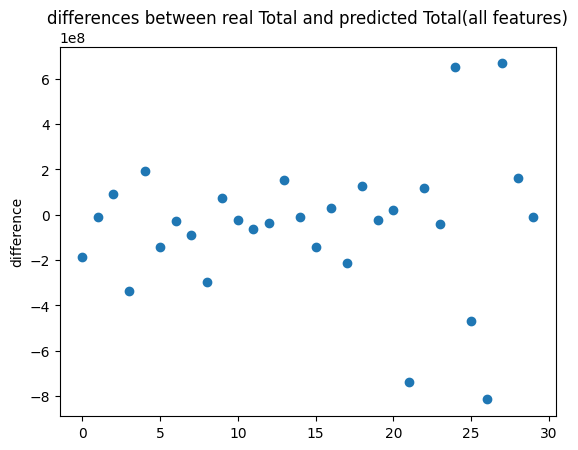

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)),predict-y_test)
plt.ylabel('difference')
plt.title('differences between real Total and predicted Total(all features)')
plt.show()

In [ ]:
X = data.drop(['Total','Artist','Title','Streams'], axis = 1)
Y = data['Total']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=45)

lrm = LinearRegression()
lrm.fit(x_train,y_train)
score = lrm.score(x_train,y_train)
print('R^2(all features): {}'.format(score))

predict = lrm.predict(x_test)

R^2(all features): 0.856715111048577


In [ ]:
X = data.drop(['Total','Artist','Title','Streams','Streams+'], axis = 1)
Y = data['Total']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=45)

lrm = LinearRegression()
lrm.fit(x_train,y_train)
score = lrm.score(x_train,y_train)
print('R^2(all features): {}'.format(score))

predict = lrm.predict(x_test)

R^2(all features): 0.8566704034892496


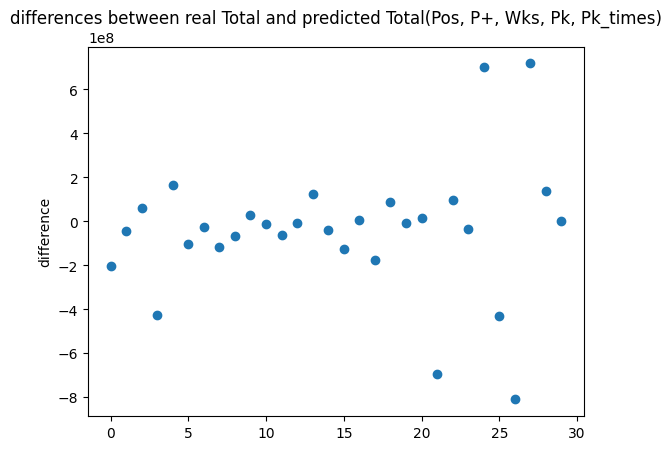

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)),predict-y_test)
plt.ylabel('difference')
plt.title('differences between real Total and predicted Total(Pos, P+, Wks, Pk, Pk_times)')
plt.show()

In [ ]:
X = data[['Wks']]
Y = data['Total']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=45)

lrm = LinearRegression()
lrm.fit(X,Y)
score = lrm.score(X,Y)
print('R^2(Wks): {}'.format(score))

predict = lrm.predict(x_test)

R^2(Wks): 0.6752440983920384


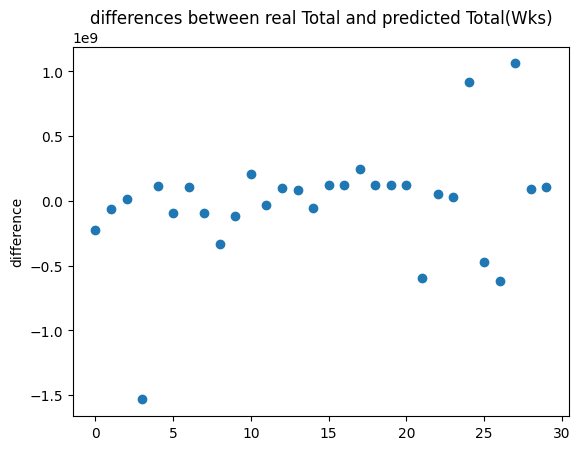

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)),predict-y_test)
plt.ylabel('difference')
plt.title('differences between real Total and predicted Total(Wks)')
plt.show()